In [3]:
!pip install -q ipympl
!pip install torch
import numpy as np
import matplotlib.pyplot as plt

  Using cached networkx-3.3-py3-none-any.whl.metadata (5.1 kB)
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 MB 54.6 MB/s eta 0:00:00a 0:00:01
Using cached jinja2-3.1.4-py3-none-any.whl (133 kB)
Using cached networkx-3.3-py3-none-any.whl (1.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 51.4 MB/s eta 0:00:00
Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)


In [5]:
!pip install tqdm
import torch
from torch import nn, optim
from tqdm import tqdm

In [7]:
!pip install torchvision
from torchvision import datasets, transforms

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.3 MB/s eta 0:00:00


100.0%


Extracting ./data/FashionMNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST_data/FashionMNIST/raw



100.0%


Extracting ./data/FashionMNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST_data/FashionMNIST/raw



100.0%


Extracting ./data/FashionMNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST_data/FashionMNIST/raw



100.0%


Extracting ./data/FashionMNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST_data/FashionMNIST/raw

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data/FashionMNIST_data/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )
Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./data/FashionMNIST_data/
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )
Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


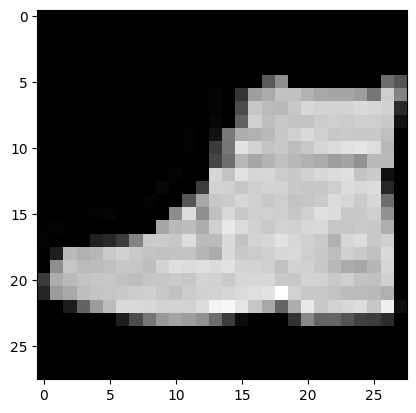

Label: Ankle boot


In [9]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.FashionMNIST('./data/FashionMNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST('./data/FashionMNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

print(trainset)
print(testset)

# Display image and label.
train_features, train_labels = next(iter(trainloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[1].squeeze()
label = train_labels[1]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {trainset.classes[label]}")

In [10]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()

        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)

        self.sigmoid = nn.Sigmoid()
        self.log_softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.log_softmax(x)

        return x

model = Network()
print(model)

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (log_softmax): LogSoftmax(dim=1)
)


In [11]:
n_epochs = 5
lr = 0.003

model = Network()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

# Training
for epoch in range(n_epochs):
    epoch_loss = 0
    for i, (images, labels) in tqdm(enumerate(trainloader), total=len(trainloader)):
        images = images.view(images.shape[0], -1)

        optimizer.zero_grad()

        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    epoch_loss = epoch_loss / len(trainloader)
    print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {epoch_loss}")

# Evaluation
with torch.no_grad():
    accuracy = 0

    for images, labels in testloader:
        images = images.view(images.shape[0], -1)
        log_ps = model(images)

        # get the predictions: argmax etc.
        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))

    accuracy = accuracy / len(testloader)
    print(f"Test Accuracy: {accuracy:.3f}")

100%|██████████| 938/938 [00:07<00:00, 123.74it/s]


Epoch 1/5, Loss: 1.9382789438721468


100%|██████████| 938/938 [00:08<00:00, 114.43it/s]


Epoch 2/5, Loss: 1.3867025441452385


100%|██████████| 938/938 [00:08<00:00, 111.62it/s]


Epoch 3/5, Loss: 1.1095688325255664


100%|██████████| 938/938 [00:08<00:00, 111.10it/s]


Epoch 4/5, Loss: 0.9562498634176722


100%|██████████| 938/938 [00:08<00:00, 105.85it/s]


Epoch 5/5, Loss: 0.8598251476852116
Test Accuracy: 0.736


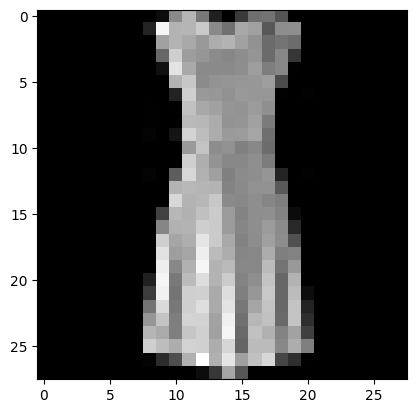

True Label: Bag


RuntimeError: mat1 and mat2 shapes cannot be multiplied (28x28 and 784x256)

In [26]:
# Load the single image and label from the testset again
image, true_label = next(iter(testloader))

# Display the image (already resized)
plt.imshow(image[0].squeeze(), cmap="gray")
plt.show()

# Print the true label
print(f"True Label: {testset.classes[true_label[1]]}")

# Flatten the image to match the input shape for the model
image = image[1].squeeze()  # Now this should work, as the image will be resized to 28x28

# Put the model into evaluation mode
model.eval()

# Make the prediction
with torch.no_grad():
    log_ps = model(image)  # Get the log-probabilities from the model
    ps = torch.exp(log_ps)  # Convert log-probabilities to probabilities
    top_p, top_class = ps.topk(1, dim=1)  # Get the top class prediction

# Get the predicted label
predicted_label = top_class.item()

# Print the predicted label
print(f"Predicted Label: {testset.classes[predicted_label]}")